Saving sample_dataset.zip to sample_dataset (1).zip
Found 8 files belonging to 2 classes.
Using 7 files for training.
Found 8 files belonging to 2 classes.
Using 1 files for validation.
Class names: ['sample_data', 'sample_dataset']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,300,770 (12.59 MB)

 Trainable params: 3,300,770 (12.59 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.2857 - loss: 0.7020 - val_accuracy: 0.0000e+00 - val_loss: 3.5997
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5714 - loss: 2.7019 - val_accuracy: 0.0000e+00 - val_loss: 1.0581
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7143 - loss: 0.5949 - val_accuracy: 1.0000 - val_loss: 0.4576
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4286 - loss: 0.9346 - val_accuracy: 1.0000 - val_loss: 0.4955
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4286 - loss: 0.8442 - val_accuracy: 1.0000 - val_loss: 0.5723
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4286 - loss: 0.7267 - val_accuracy: 1.0000 - val_loss: 0.6421
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4286 - loss: 0.6509 - val_accuracy: 0.0000e+00 - val_loss: 0.7187
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7143 - loss: 0.5880 - val_accuracy: 0.0000e+00 - val

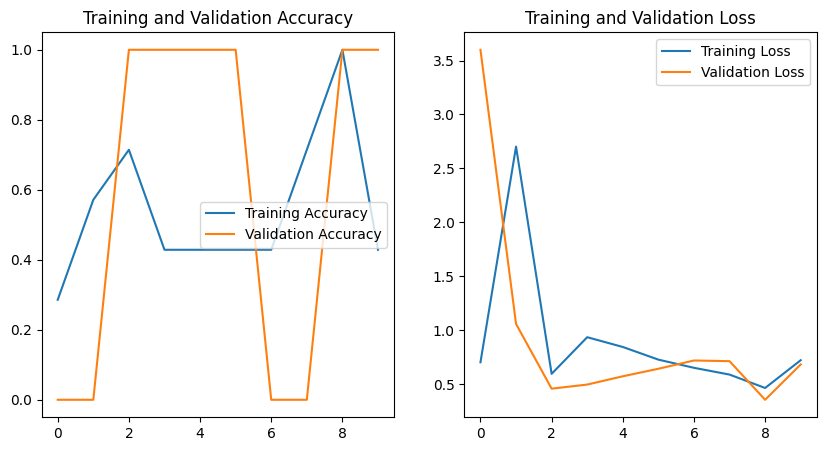

KeyboardInterrupt: 

In [2]:
# ✅ STEP 1: Install libraries
!pip install tensorflow tensorflowjs

# ✅ STEP 2: Upload your ZIP file (should contain class folders like Cat/, Dog/)
from google.colab import files
import zipfile
import os

uploaded = files.upload()

for file in uploaded.keys():
    with zipfile.ZipFile(file, 'r') as zip_ref:
        zip_ref.extractall("data")

# ✅ STEP 3: Load the dataset
import tensorflow as tf

img_height = 180
img_width = 180
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "data",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names
print("Class names:", class_names)

# ✅ STEP 4: Improve performance with prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# ✅ STEP 5: Build and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names))
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

# ✅ STEP 6: Train the model
epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

# ✅ STEP 7: Visualize training results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# ✅ STEP 8: Test with a custom image
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

test_img = files.upload()
for img_name in test_img.keys():
    img_path = img_name
    img = load_img(img_path, target_size=(img_height, img_width))
    img_array = img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        f"This image most likely belongs to '{class_names[np.argmax(score)]}' "
        f"with a {100 * np.max(score):.2f}% confidence."
    )

# ✅ STEP 9: (Optional) Export model to TensorFlow.js
model.save("my_model.h5")
!tensorflowjs_converter --input_format keras my_model.h5 tfjs_model/

# Download the TensorFlow.js model
import shutil
shutil.make_archive('tfjs_model', 'zip', 'tfjs_model')
files.download('tfjs_model.zip')
